In [2]:
import os
import subprocess
import pandas as pd
from multiprocessing import Pool

import matplotlib.pyplot as plt

In [3]:
cmd = "find /global/cfs/cdirs/metatlas/projects/envnet_build_files -name '*_deconvoluted.parquet'"
result = subprocess.run(cmd, shell=True, capture_output=True, text=True)
files = result.stdout.splitlines()
len(files)

1401

In [4]:
def get_summary(file):
    temp = pd.read_parquet(file)
    d = {}
    d['min_rt'] = temp['rt'].min()
    d['max_rt'] = temp['rt'].max()
    d['num_spectra'] = temp.shape[0]
    d['median_rt'] = temp['rt'].median()
    d['filename'] = file
    return d


with Pool(processes=20) as pool:
    df = pool.map(get_summary, files)

df = pd.DataFrame(df)
df['basename'] = df['filename'].apply(lambda x: os.path.basename(x))
df.sort_values('median_rt',ascending=False,inplace=True)

In [5]:
df.head(40)

,min_rt,max_rt,num_spectra,median_rt,filename,basename
820,1.005137,29.725889,2395,14.135005,/global/cfs/cdirs/metatlas/projects/envnet_bui...,Mtab_FT_020211_04_deconvoluted.parquet
810,1.001842,29.984844,2463,13.729032,/global/cfs/cdirs/metatlas/projects/envnet_bui...,Mtab_FT_020211_06_deconvoluted.parquet
636,2.139995,26.422516,8195,13.442086,/global/cfs/cdirs/metatlas/projects/envnet_bui...,DOM_Interlab-LCMS_Lab024_A45M_NEG_MS2_rep3_dec...
666,2.139995,26.422516,8332,13.410382,/global/cfs/cdirs/metatlas/projects/envnet_bui...,DOM_Interlab-LCMS_Lab024_A45M_NEG_MS2_rep3_dec...
818,1.002873,29.947830,2565,13.305165,/global/cfs/cdirs/metatlas/projects/envnet_bui...,Mtab_FT_012611_21_deconvoluted.parquet
812,1.002573,29.951908,2382,13.303638,/global/cfs/cdirs/metatlas/projects/envnet_bui...,Mtab_FT_020211_08_deconvoluted.parquet
814,1.011235,29.991602,3091,13.297557,/global/cfs/cdirs/metatlas/projects/envnet_bui...,Mtab_FT_012611_09_deconvoluted.parquet
817,1.006420,29.927855,2662,13.273118,/global/cfs/cdirs/metatlas/projects/envnet_bui...,Mtab_FT_012611_23_deconvoluted.parquet
815,1.002473,29.976540,2608,13.264791,/global/cfs/cdirs/metatlas/projects/envnet_bui...,Mtab_FT_012611_22_deconvoluted.parquet
816,1.017633,29.992453,3380,12.973108,/global/cfs/cdirs/metatlas/projects/envnet_bui...,Mtab_FT_012611_07_deconvoluted.parquet


(array([ 60.,  93., 173., 392., 206., 156., 171.,  44.,  23.,  10.,   5.,
         10.,   6.,   5.,   8.,  25.,   1.,   4.,   7.,   2.]),
 array([ 2.612162  ,  3.18830415,  3.7644463 ,  4.34058845,  4.9167306 ,
         5.49287275,  6.0690149 ,  6.64515705,  7.2212992 ,  7.79744135,
         8.3735835 ,  8.94972565,  9.5258678 , 10.10200995, 10.6781521 ,
        11.25429425, 11.8304364 , 12.40657855, 12.9827207 , 13.55886285,
        14.135005  ]),
 <BarContainer object of 20 artists>)

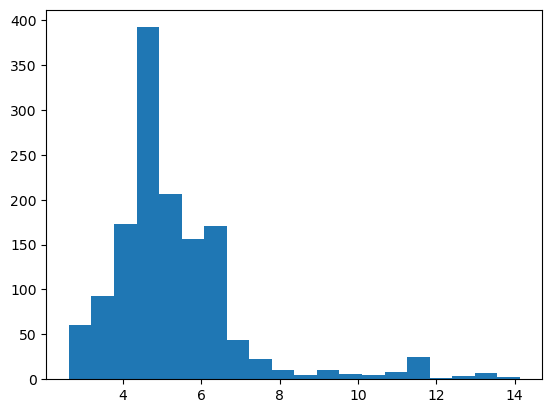

In [6]:
fig,ax = plt.subplots()
ax.hist(df['median_rt'],bins=20)

In [7]:
idx = df['median_rt'] > 11
df.loc[idx,'basename']

820               Mtab_FT_020211_04_deconvoluted.parquet
810               Mtab_FT_020211_06_deconvoluted.parquet
636    DOM_Interlab-LCMS_Lab024_A45M_NEG_MS2_rep3_dec...
666    DOM_Interlab-LCMS_Lab024_A45M_NEG_MS2_rep3_dec...
818               Mtab_FT_012611_21_deconvoluted.parquet
812               Mtab_FT_020211_08_deconvoluted.parquet
814               Mtab_FT_012611_09_deconvoluted.parquet
817               Mtab_FT_012611_23_deconvoluted.parquet
815               Mtab_FT_012611_22_deconvoluted.parquet
816               Mtab_FT_012611_07_deconvoluted.parquet
811               Mtab_FT_020311_21_deconvoluted.parquet
819               Mtab_FT_020311_03_deconvoluted.parquet
813               Mtab_FT_020311_05_deconvoluted.parquet
809               Mtab_FT_020211_20_deconvoluted.parquet
631    DOM_Interlab-LCMS_Lab024_M_NEG_MS2_rep1_deconv...
484    DOM_Interlab-LCMS_Lab8_PPLBlk_Neg_MS2_rep1_dec...
661    DOM_Interlab-LCMS_Lab024_M_NEG_MS2_rep1_deconv...
640    DOM_Interlab-LCMS_Lab024